# Informe Tarea 2 Grupo 2
## Nombre Alumnas/os: Ignacio Brito, José Tomás De la Peña, Ítalo Salazar, Alex Villarroel

## P1 - Programación del Problema Directo
Se provee de una carpeta ajuste_ortogonal_recta que deberá copiar en la carpeta del paquete de python
desarrollado en la Tarea 1, es decir al interior de GF7013/models/. En este módulo se encuentra la definición
de la recta paramétrica y el prototipo de una clase forward que permitirá calcular el modelo directo.
En un intento por generalizar los códigos de muestreo que se utilizan posteriormente, se definirá un requerimiento
que debe cumplir la clase forward (que implementa el modelo directo para cualquier problema y no sólo para el
ajuste ortogonal a la recta): que un objeto que sea instancia de la clase forward debe implementar la función
miembro eval(m) donde m es el vector de parámetros del modelo.
Para el problema del ajuste ortogonal de la linea recta, se tiene m = [a, θ]⊤, donde a es la distancia de la recta
al origen y θ define la orientación de la recta en sentido anti-horario con respecto al eje x (ver apunte que define
el problema de ajuste ortogonal a la recta).
Luego se pide:

### P1.1 Completar la función eval(self, m) de la manera más concisa posible. Para ello utilice el paquete recta que se provee.
-----------------------------------------------------------------------------------------------
La función eval se calculó calcula la predicción de los parámetros del modelo, es decir, dados los valores de las observaciones (incluyendo los sigmas), y los parámetros de modelo, en este caso a y el ángulo $\theta$, retorne los valores de la estimación del problema directo

Este método se implementó de la siguiente manera:

```python
class forward(object):
# 
# definición de la clase ...
# método eval
    def eval(self, m):
        """
        Computes a prediction of the model parameters (see description in this
        module docstring).
        - m = NP.array([a, theta]) with theta in degrees (both float quantities). 
          -> a is the distance between straight line to origin of coordinate system and 
          -> theta is the orientation of the straight line measured counter-clockwise 
            measured from x axis. 
        """
        # Extract model parameters
        a, theta = m[0], m[1]

        # calculate the predicted points in the straight line
        dpred = recta.calc_xy_pred(a, theta, self.x_obs, self.y_obs)

        # dpred incluyendo el cálculo de los sigma

        return dpred


In [9]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../../..')))


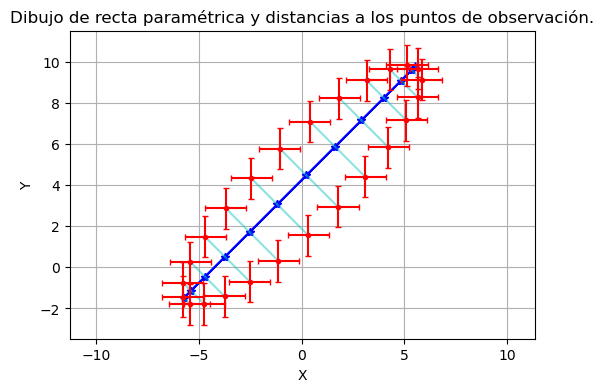

In [ ]:
### P1 - Ejemplo de modelo directo


from GF7013.models.ajuste_ortogonal_recta.forward import forward
import numpy as np
from GF7013.bin.Tarea2.P1.datos import obtener_datos_elipses
from GF7013.models.ajuste_ortogonal_recta import recta
N = 25
semi_eje_mayor = 8
semi_eje_menor = 2
alpha = 45
delta_x = 0
delta_y = 4
desviacion_estandar_x = 1.0
desviacion_estandar_y = 1.0
# valores de d
x_obs, y_obs, sigma_x, sigma_y = obtener_datos_elipses(
                                        N = N,
                                        a = semi_eje_mayor,
                                        b = semi_eje_menor,
                                        alpha = alpha,
                                        deltax = delta_x,
                                        deltay = delta_y,
                                        sigma_x = desviacion_estandar_x,
                                        sigma_y = desviacion_estandar_y)
# valores de m 
a = 3
theta = 45 # grados sexagesimales despues de hacer P1.1)
# se define m como un array
m = np.array([a, theta]) # modelo de recta a graficar.

directo = forward(x_obs=x_obs, y_obs=y_obs, sigma_x=sigma_x, sigma_y=sigma_y)
# le calculamos las predicciones de la recta
# s es el vector con la proyeccion ortogonal de cada punto en la recta.
# s = np.array([np.array([x_obs[i], y_obs[i]]).dot(t) for i in range(0, len(x_obs))])
x_pred, y_pred, s = directo.eval(m)

# plotear los resultados
import matplotlib.pyplot as plt
fig = plt.figure(1)
fig.clear()
fig.set_size_inches((6, 4))
ax = fig.add_subplot(111)
# en el comando siguiente, si el color es 'none' no se grafica el elemento.
# recta.plot_recta(ax, *m, x_obs=x_obs, y_obs=y_obs, color_dist='c', color='b')
ax.plot(x_pred, y_pred, 'b-*', label='Recta paramétrica')
ax.plot([x_pred, x_obs],
        [y_pred, y_obs],
        linestyle = '-', 
        color = 'c', 
        alpha = alpha/100)
ax.errorbar(x=x_obs, y=y_obs, xerr=sigma_x, yerr=sigma_y, fmt='.r', capsize=2)
ax.axis('equal')
ax.grid('on')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Dibujo de recta paramétrica y distancias a los puntos de observación.')
fig.canvas.draw()
plt.show()

##  P2. Modelación Inversa usando Métodos Bayesianos: A priori's y función  $f_{prior}(m)$

### P2.2 Función de Verosimilitud $\mathcal{L}(m)$